In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df=pd.read_csv("dataset.csv")
df.head()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,101,65,130,250,72,28.0,Hypertension with high cholesterol.,"Medication: Lisinopril (blood pressure), Stati...",Active Recovery,"Lisinopril, Statins.",Quarterly.
1,102,42,110,150,76,24.0,Pre-hypertension.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Six months.
2,103,58,140,200,80,30.0,Type 2 Diabetes.,Medication: Metformin (blood sugar control). L...,Active Recovery,Metformin.,Quarterly.
3,104,71,160,220,88,32.0,Heart Failure.,"Medication: Digoxin (heart function), Furosemi...",Active Recovery,"Digoxin, Furosemide.",Monthly.
4,105,35,120,180,74,27.0,Overweight.,"Lifestyle modification: Regular exercise, heal...",Recovered,N/A.,Three months.


In [5]:
df.shape

(100, 11)

In [35]:
df.describe()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
count,100.000000,100.000000,100.000000,100.000000,100.000000,100.000000
mean,107.480000,49.210000,126.100000,199.850000,79.380000,26.970000
std,4.678513,13.121264,15.018171,37.121524,7.947784,4.255015
min,101.000000,25.000000,95.000000,120.000000,60.000000,18.000000
25%,103.750000,39.750000,115.000000,177.500000,75.000000,24.000000
50%,107.000000,50.000000,125.000000,200.000000,80.000000,27.000000
75%,111.000000,60.000000,135.000000,226.250000,85.000000,30.000000
max,118.000000,75.000000,160.000000,300.000000,110.000000,40.000000


In [36]:
df.isnull()

,Patient ID,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis,Treatment Plan,Recovery Status,Medication Type,Follow-up Requirement
0,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...
95,False,False,False,False,False,False,False,False,False,False,False
96,False,False,False,False,False,False,False,False,False,False,False
97,False,False,False,False,False,False,False,False,False,False,False
98,False,False,False,False,False,False,False,False,False,False,False


In [37]:
data=df[['Age','Blood Pressure','Cholesterol Levels','Heart Rate','BMI','Diagnosis']]
data.head()

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI,Diagnosis
0,65,130,250,72,28.0,Hypertension with high cholesterol.
1,42,110,150,76,24.0,Pre-hypertension.
2,58,140,200,80,30.0,Type 2 Diabetes.
3,71,160,220,88,32.0,Heart Failure.
4,35,120,180,74,27.0,Overweight.


In [38]:
data['Diagnosis']=data['Diagnosis'].apply(
    lambda x: 1 if 'Hypertension' in x else 0
)

C:\Users\SUPRATIM NAG\AppData\Local\Temp\ipykernel_8420\1538773476.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Diagnosis']=data['Diagnosis'].apply(


In [39]:
x=data.drop('Diagnosis',axis=1)
y=data[['Diagnosis']]

In [40]:
x

,Age,Blood Pressure,Cholesterol Levels,Heart Rate,BMI
0,65,130,250,72,28.0
1,42,110,150,76,24.0
2,58,140,200,80,30.0
3,71,160,220,88,32.0
4,35,120,180,74,27.0
...,...,...,...,...,...
95,45,140,260,85,32.0
96,70,125,200,70,25.0
97,55,115,180,80,24.0
98,30,120,190,75,23.0


In [41]:
y

,Diagnosis
0,1
1,0
2,0
3,0
4,0
...,...
95,1
96,0
97,0
98,0


In [43]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20)

In [48]:
from sklearn.tree import DecisionTreeClassifier,plot_tree
dt=DecisionTreeClassifier(criterion='entropy',max_depth=7)
dt.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7)

In [49]:
dt.score(x_train,y_train)

0.95

In [52]:
y_pred=dt.predict(x_test)

In [53]:
y_pred

array([1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0],
      dtype=int64)

In [54]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(classification_report(y_test,y_pred))
print(confusion_matrix(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.79      0.73      0.76        15
           1       0.33      0.40      0.36         5

    accuracy                           0.65        20
   macro avg       0.56      0.57      0.56        20
weighted avg       0.67      0.65      0.66        20

[[11  4]
 [ 3  2]]
0.65


In [57]:
dt.feature_importances_

array([0.32197773, 0.20942158, 0.10637305, 0.10979636, 0.25243128])

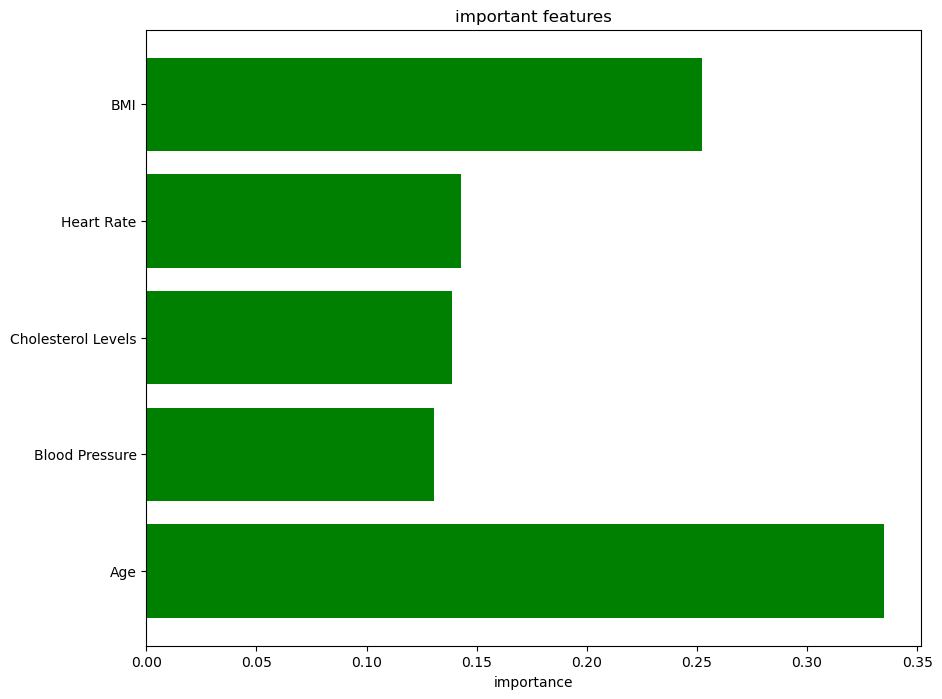

In [60]:
# Get feature importances from the model
importances = model.feature_importances_
feature_names = x.columns
plt.figure(figsize=(10,8))
plt.barh(feature_names,importances,color="green")
plt.xlabel("importance")
plt.title("important features")
plt.show()

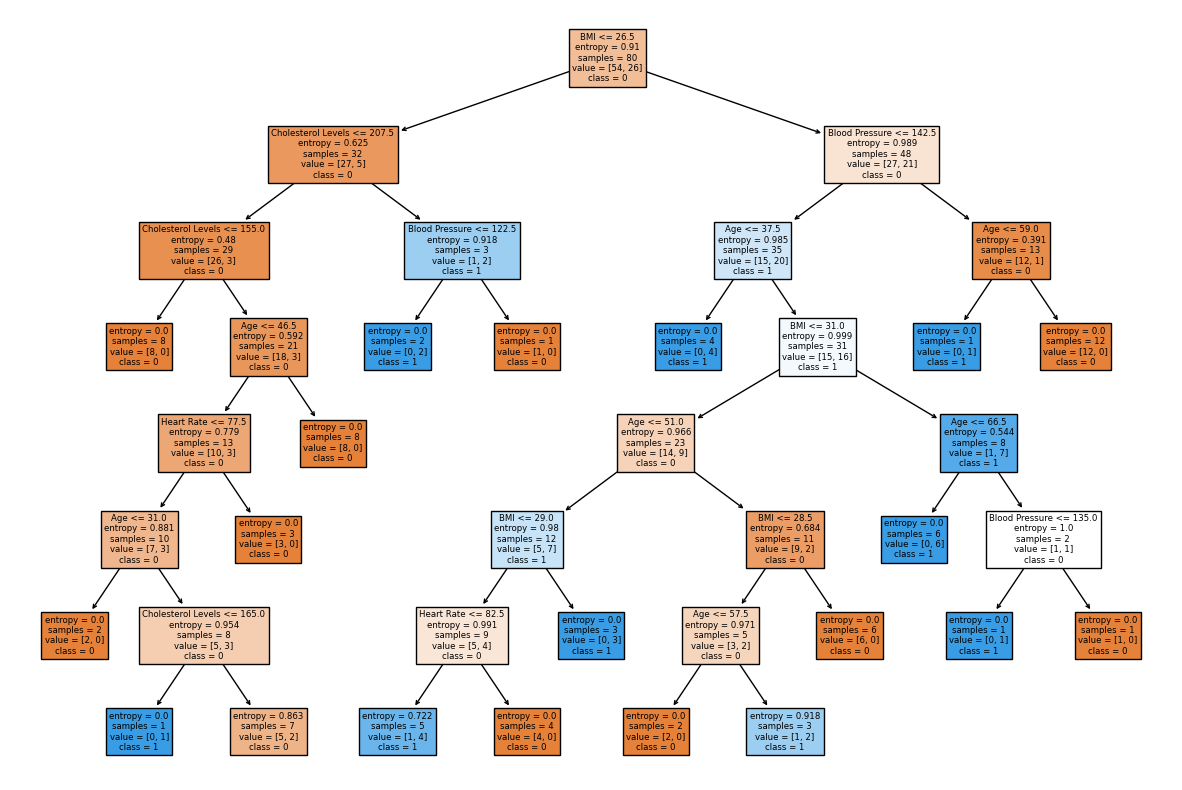

In [63]:
plt.figure(figsize=(15,10))
plot_tree(dt,filled=True,feature_names=x.columns,class_names=dt.classes_.astype(str))
plt.show()